In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.optimize import minimize

In [2]:
np.random.seed(42)


In [3]:
lambda_=5
data = np.random.poisson(lambda_,1000)

In [4]:
data

array([ 5,  4,  4,  5,  5,  3,  5,  4,  6,  7,  2,  5,  5,  6,  4,  6,  6,
        1,  7,  2, 11,  4,  3,  8,  3,  3,  5,  8,  3,  2,  5,  3,  8, 10,
        3,  2,  5,  7,  6,  6,  2,  4,  9,  7, 11,  8,  3,  2,  3,  4,  5,
        5,  4,  3,  8,  2,  1,  4,  5,  4,  3,  4,  8,  2,  2,  2,  7,  6,
        7,  6,  7,  6,  4,  2,  3,  4,  7,  4,  3,  2,  6,  3,  5,  9,  6,
        6,  9,  4,  9,  2, 10,  6,  9,  4,  1,  6,  8,  6,  2,  3,  5,  3,
        3,  5,  6,  5,  3,  5,  3,  3,  6,  5,  6,  2,  4,  7,  6,  5,  4,
        3,  3,  7,  7,  6,  6,  7,  8,  6,  3,  7,  5,  5,  7,  4,  9,  4,
        5,  2,  6,  3,  6,  2,  3,  5,  3,  4,  5,  6,  3,  3,  4,  5,  4,
        2,  6,  6,  8,  1,  6,  2,  5,  2,  6,  4,  3,  5,  6,  3,  4,  8,
        4, 10,  4,  5, 10,  3,  4,  7,  5, 10,  4,  2,  3,  5,  8,  4,  3,
        8,  6,  8,  3,  3,  5, 11,  7,  4,  3,  8,  8,  3,  3,  6,  2,  7,
        5,  5,  6,  1, 10,  2,  5,  4,  5,  4,  5,  6,  1,  3,  2,  5,  4,
        7,  7,  2,  6,  7

In [8]:
from math import factorial
def vero_poisson(l,d):
    vero=np.sum(data*np.log(l) - l-np.log([factorial(x) for x in data]))
    return vero            

In [9]:
emv_r=minimize(lambda params: -vero_poisson(params[0],data),x0=[1])

In [11]:
emv_r

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2207.434459724971
        x: [ 4.985e+00]
      nit: 9
      jac: [ 0.000e+00]
 hess_inv: [[ 4.983e-03]]
     nfev: 20
     njev: 10

In [15]:
#lambda obtenida por máxima verosimilitud
l_mv=emv_r.x[0]

In [16]:
l_mv

np.float64(4.9850000010215485)

In [19]:
#media muestral
mm=np.mean(data)





In [20]:
l_mv-mm

np.float64(1.0215481793807157e-09)

In [21]:
lv= np.linspace(0.1,10,100)
vero_v=[vero_poisson(l,data)for l in lv]

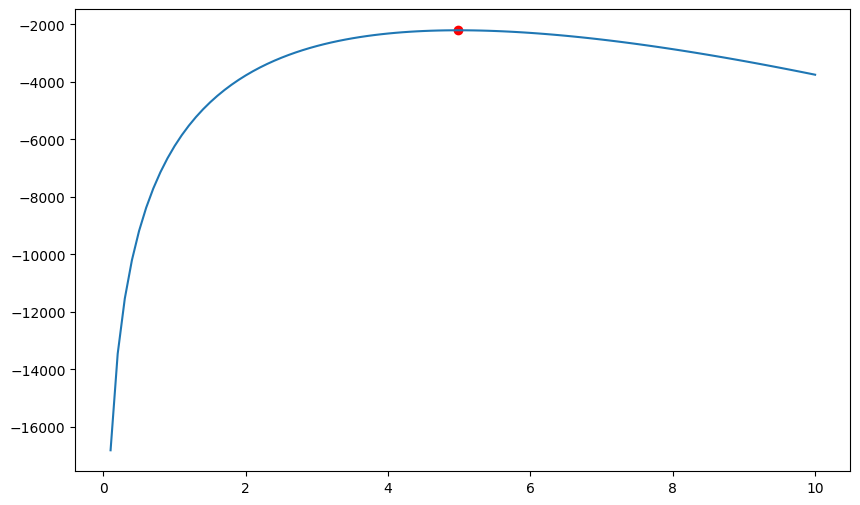

In [24]:
plt.figure(figsize=(10,6))
plt.plot(lv,vero_v,label='función de verosimilitud')
plt.scatter([l_mv],[vero_poisson(l_mv,data)],color='red')

In [26]:
####NORMAL
data=np.random.normal(loc=5,scale=2,size=1000)





In [27]:
media_mv=np.mean(data)
std_mv=np.std(data,ddof=0)

In [29]:
std_mv

np.float64(2.1009475378700904)

In [30]:

def vero_normal(mean,std,data):
   return np.sum(st.norm.logpdf(data,loc=mean,scale=std)) 

In [36]:
mu_0=0
tau=10
alpha=1
beta=1

In [40]:
def log_pre(mean,std):
    log_pre_mu=st.norm.logpdf(mean,loc=mu_0,scale=tau) 
    log_pre_sigma=st.invgamma.logpdf(std,a=alpha,scale=beta)
    return log_pre_mu+log_pre_sigma
def log_pos(mean,std,data):
    return vero_normal(mean,std,data)+log_pre(mean,std)

In [41]:
emv=vero_normal(media_mv,std_mv,data)

In [42]:
emv_pos=log_pos(media_mv,std_mv,data)

In [44]:
emv_pos-emv

np.float64(-5.3012932367960275)

In [46]:
medias=np.linspace(4,6,100)
stds=np.linspace(1,3,100)
veros=np.zeros((len(medias),len(stds)))
posts=np.zeros((len(medias),len(stds)))

In [48]:
for i ,m in enumerate(medias):
    for j, s in enumerate(stds):
        veros[i,j]=vero_normal(m,s,data)
        posts[i,j]=log_pos(m,s,data)

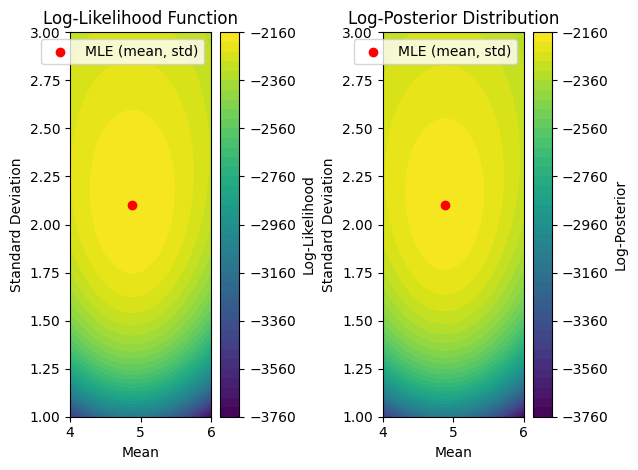

In [51]:
plt.subplot(1, 2, 1)
X, Y = np.meshgrid(medias, stds)
Z = veros.T  # Transpose to align the axes correctly
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='Log-Likelihood')
plt.scatter(media_mv, std_mv, color='red', label='MLE (mean, std)', zorder=5)
plt.xlabel('Mean')
plt.ylabel('Standard Deviation')
plt.title('Log-Likelihood Function')
plt.legend()

# Plot log-posterior
plt.subplot(1, 2, 2)
Z = posts.T  # Transpose to align the axes correctly
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='Log-Posterior')
plt.scatter(media_mv, std_mv, color='red', label='MLE (mean, std)', zorder=5)
plt.xlabel('Mean')
plt.ylabel('Standard Deviation')
plt.title('Log-Posterior Distribution')
plt.legend()

plt.tight_layout()
plt.show()

In [53]:
#intervalos de confianza


d = [12, 15, 14, 10, 13, 17, 14, 15, 16, 14]
cl=0.95

In [54]:
intervalo=st.t.interval(cl,df=len(d)-1,loc=np.mean(d),scale=np.std(d,ddof=1))/np.sqrt(len(d))

In [55]:
intervalo

array([2.99647491, 5.85790254])

In [56]:
intervalo=st.t.interval(cl,df=len(data)-1,loc=np.mean(data),scale=np.std(data,ddof=1))/np.sqrt(len(data))

In [57]:
intervalo

array([0.02384463, 0.28472238])